In [2]:
import pandas as pd
from pandas import DataFrame

try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)


k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [3]:
# Log-Trasformo la colonna k_m2 in base 10
import numpy as np
df['k_m2'] = np.log10(df['k_m2'])
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity       k_m2
0      310.913     0.137   5.065  -25.849      2.0340 -11.831694
1      310.913     0.147   5.253  -31.002      2.6650 -11.646907
2      310.913     0.131   4.697  -20.047      2.1090 -11.020307
3      350.137     0.115   5.583  -50.613      4.1830 -12.014802
4      350.137     0.139   7.447 -136.737      2.5950 -12.037120
5      350.137     0.115   5.311  -32.907      4.1010 -11.842914
6      368.141     0.134   6.990 -115.218      2.7740 -12.396823
7      368.141     0.138   7.132 -110.411      2.7790 -11.404832
8      368.141     0.116   5.290  -39.748      3.8680 -11.713564
9       10.573     0.020   0.791   -3.948      3.1000 -12.519734
10      10.573     0.020   0.806   -2.017      2.9000 -12.496150
11     458.436     0.273   7.721 -102.424      1.7170 -10.258372
12     458.436     0.250   6.870  -76.478      1.3530 -10.417665
13     458.436     0.265   7.560  -95.050      1.5730 -10.277698
14     607.796     0.250 

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)

DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.422383  0.449469  0.933953    0.222507  0.476669
1     0.502894  0.458484  0.469240  0.919672    0.424816  0.526208
2     0.502894  0.400722  0.410769  0.950032    0.246553  0.694191
3     0.568572  0.342960  0.503944  0.865322    0.911510  0.427581
4     0.568572  0.429603  0.699968  0.626641    0.402373  0.421597
5     0.568572  0.342960  0.475339  0.914392    0.885220  0.473661
6     0.598718  0.411552  0.651909  0.686278    0.459763  0.325166
7     0.598718  0.425993  0.666842  0.699600    0.461366  0.591105
8     0.598718  0.346570  0.473131  0.895433    0.810516  0.508338
9     0.000000  0.000000  0.000000  0.994648    0.564283  0.292215
10    0.000000  0.000000  0.001577  1.000000    0.500160  0.298538
11    0.749909  0.913357  0.728783  0.721735    0.120872  0.898455
12    0.749909  0.830325  0.639289  0.793641    0.004168  0.855751
13    0.749909  0.884477  0.711852  0.74217

Random_state: 0 - R^2 score: 0.24385745942130033
Random_state: 1 - R^2 score: 0.20931207369108062
Random_state: 2 - R^2 score: 0.6588472435339588
Random_state: 3 - R^2 score: 0.7789374034921224
Random_state: 4 - R^2 score: 0.6227441805396359
Random_state: 5 - R^2 score: 0.12643324506884712
Random_state: 6 - R^2 score: 0.43296777409566056
Random_state: 7 - R^2 score: 0.7901587523146939
Random_state: 8 - R^2 score: 0.523863487329976
Random_state: 9 - R^2 score: 0.3429783055535237
Random_state: 10 - R^2 score: -0.0373390309425119
Random_state: 11 - R^2 score: 0.4101009384041193
Random_state: 12 - R^2 score: -0.17966065423966304
Random_state: 13 - R^2 score: -6.830368076830338
Random_state: 14 - R^2 score: 0.4841233676768395
Random_state: 15 - R^2 score: 0.5669484054852337
Random_state: 16 - R^2 score: -0.7545792840750354
Random_state: 17 - R^2 score: 0.45242501571551696
Random_state: 18 - R^2 score: 0.7141048737385484
Random_state: 19 - R^2 score: 0.8900792272004818
Random_state: 20 - R^2

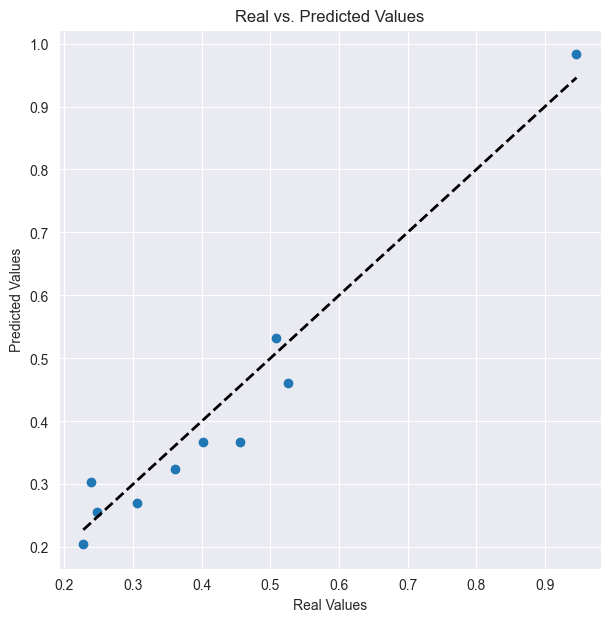

In [9]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

best_random_state_split = None
best_score_split = -float('inf')

#Voglio visualizzare anche il grafico per il miglior random_state per train_test_split con valori predetti vs valori reali in base al miglior R^2 score finale
import matplotlib.pyplot as plt
best_y_pred = None
best_y_test = None


for random_state in range(0, 100):
    X = df_scaled.drop('k_m2', axis=1)
    y = df_scaled['k_m2']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_pred = y_pred
        best_y_test = y_test
        
    print(f"Random_state: {random_state} - R^2 score: {score}")

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")

plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred)
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import logging
from tqdm.notebook import tqdm
import joblib




param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 5],
    'random_state': [0,1,2,3,4,5,6,7,8,9,10,11]

}

X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)

model = XGBRegressor(random_state=best_random_state_split)


# Integra tqdm con joblib per mostrare la progress bar
tqdm_callback = lambda iterable: tqdm(
    iterable, 
    total=len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth']) * len(param_grid['subsample']) * len(param_grid['colsample_bytree']), 
    desc="Hyperparameter tuning"
)

# Usa joblib per patchare il parallel computing di scikit-learn
with joblib.parallel_backend('loky', inner_max_num_threads=1):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.7}
R^2 score: 0.7996130833995226
MSE: 0.008270715466771548
MAE: 0.07041304475953018


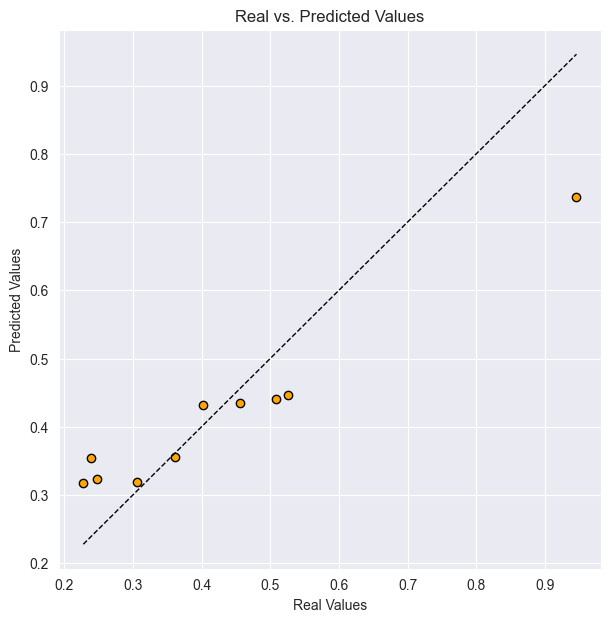

In [7]:
#Visualizzazione

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, color='orange', alpha=0.99, edgecolors='black') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

In [8]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': y_test,
    'Valori Predetti': y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
34      0.227920         0.317053
1       0.526208         0.446465
44      0.239655         0.353628
40      0.361153         0.355718
8       0.508338         0.441027
18      0.247994         0.322804
16      0.945880         0.736709
24      0.456153         0.434774
19      0.305634         0.319632
23      0.402788         0.431965


Best random_state for train_test_split: 48 with R^2 score: 0.8684443634494712


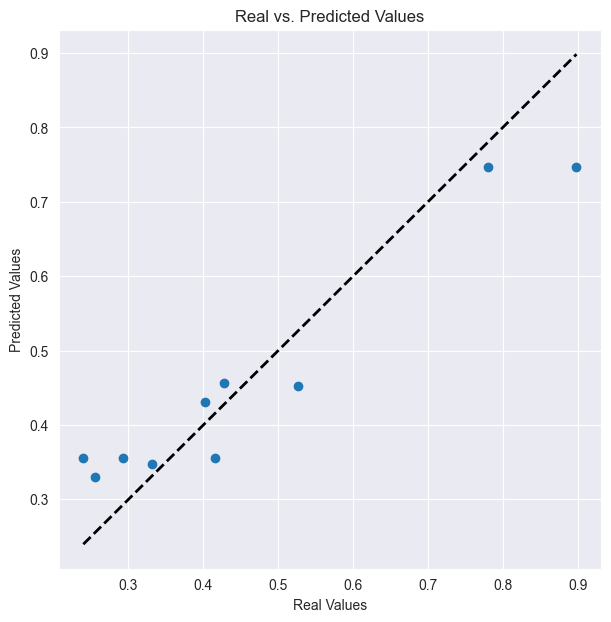

In [10]:
#Con gli iperparametri migliori trovati, riaddestro il modello sul miglior random state per train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')

#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor(
        colsample_bytree = 0.7, 
        learning_rate = 0.01,
        max_depth = 3,
        min_child_weight= 1,
        n_estimators = 150,
        subsample = 0.7
    )
    
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_pred = y_pred
        best_y_test = y_test

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")
plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred)
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()



In [11]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': best_y_test,
    'Valori Predetti': best_y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
44      0.239655         0.355282
3       0.427581         0.456282
1       0.526208         0.453025
14      0.780892         0.747306
33      0.255869         0.329542
30      0.332076         0.347161
9       0.292215         0.355282
11      0.898455         0.746358
23      0.402788         0.430725
45      0.416003         0.354944
